In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import math
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv("/kaggle/input/anomaly-detection/creditcard.csv")

In [ ]:
df_train = df[df['Class'] == 0]
df_anamoly = df[df['Class'] == 1].reset_index().drop(columns = 'index')
df_test = df_anamoly.iloc[:int(len(df_anamoly)/2),:]
df_val = df_anamoly.iloc[int(len(df_anamoly)/2+1):,:]

In [ ]:
Mean_Value_list = []
for col in df_train.columns:
    if(col != 'Class' ):
        Mean_Value_list.append(df_train[col].mean())
Mean_Value_array = np.asarray(Mean_Value_list)

In [ ]:
Vari_Value_list = []
for col in df_train.columns:
    if(col != 'Class' ):
        Vari_Value_list.append(df_train[col].var())
Vari_Value_array = np.asarray(Vari_Value_list)

# UniVariate Gaussion Distribution

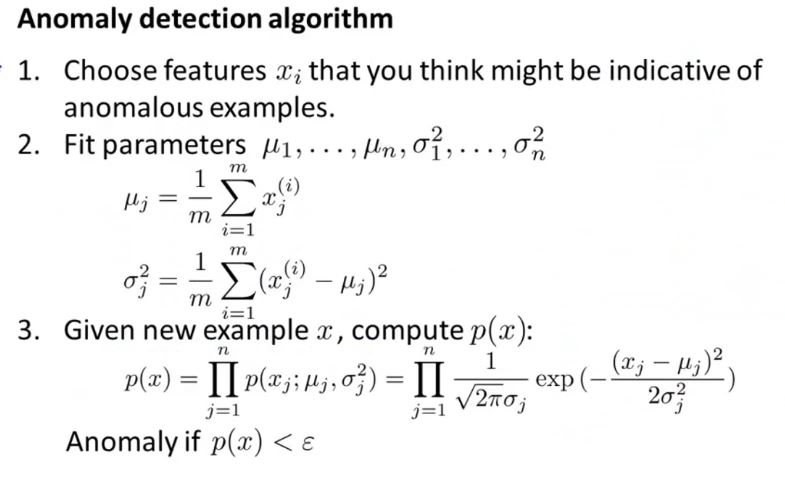

Pic Credits : Andrew Ng

In [ ]:
X_Val = np.array(df_val.iloc[:,:30])
Y_Val = np.array(df_val.iloc[:,30:31])

In [ ]:
def probaDis (X_test,mu_array,sigma2_array):
    probaDis_lst = []
    from scipy.stats import norm
    pdfs_array = norm.pdf(X_test,mu_array,sigma2_array**0.5)
    for pdf in pdfs_array :
        probaDis_lst.append(np.prod(pdf))              
    return np.array(probaDis_lst)        

In [ ]:
probaDis_array = probaDis(X_Val,Mean_Value_array,Vari_Value_array)

In [ ]:
Best_eps = np.max(probaDis_array)/1000
Y_pred =probaDis_array<Best_eps
f1_score(Y_Val,Y_pred)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix 
sns.heatmap(confusion_matrix(Y_Val,Y_pred),annot = True,fmt="d")

In [ ]:
X_test = np.array(df_test.iloc[:,:30])
Y_test = np.array(df_test.iloc[:,30:31])

In [ ]:
probaDis_test_array = probaDis(X_test,Mean_Value_array,Vari_Value_array)

In [ ]:
Y_pred_test =probaDis_test_array<Best_eps
f1_score(Y_test,Y_pred_test)

In [ ]:
sns.heatmap(confusion_matrix(Y_test,Y_pred_test),annot = True,fmt="d")

# MultiVariate Gaussian Distribution

In [ ]:
TrainingData = df_train.loc[:,:'Amount']
TrainingData =np.array(TrainingData)

In [ ]:
CovarianceMatrix = np.cov(TrainingData,rowvar= False)

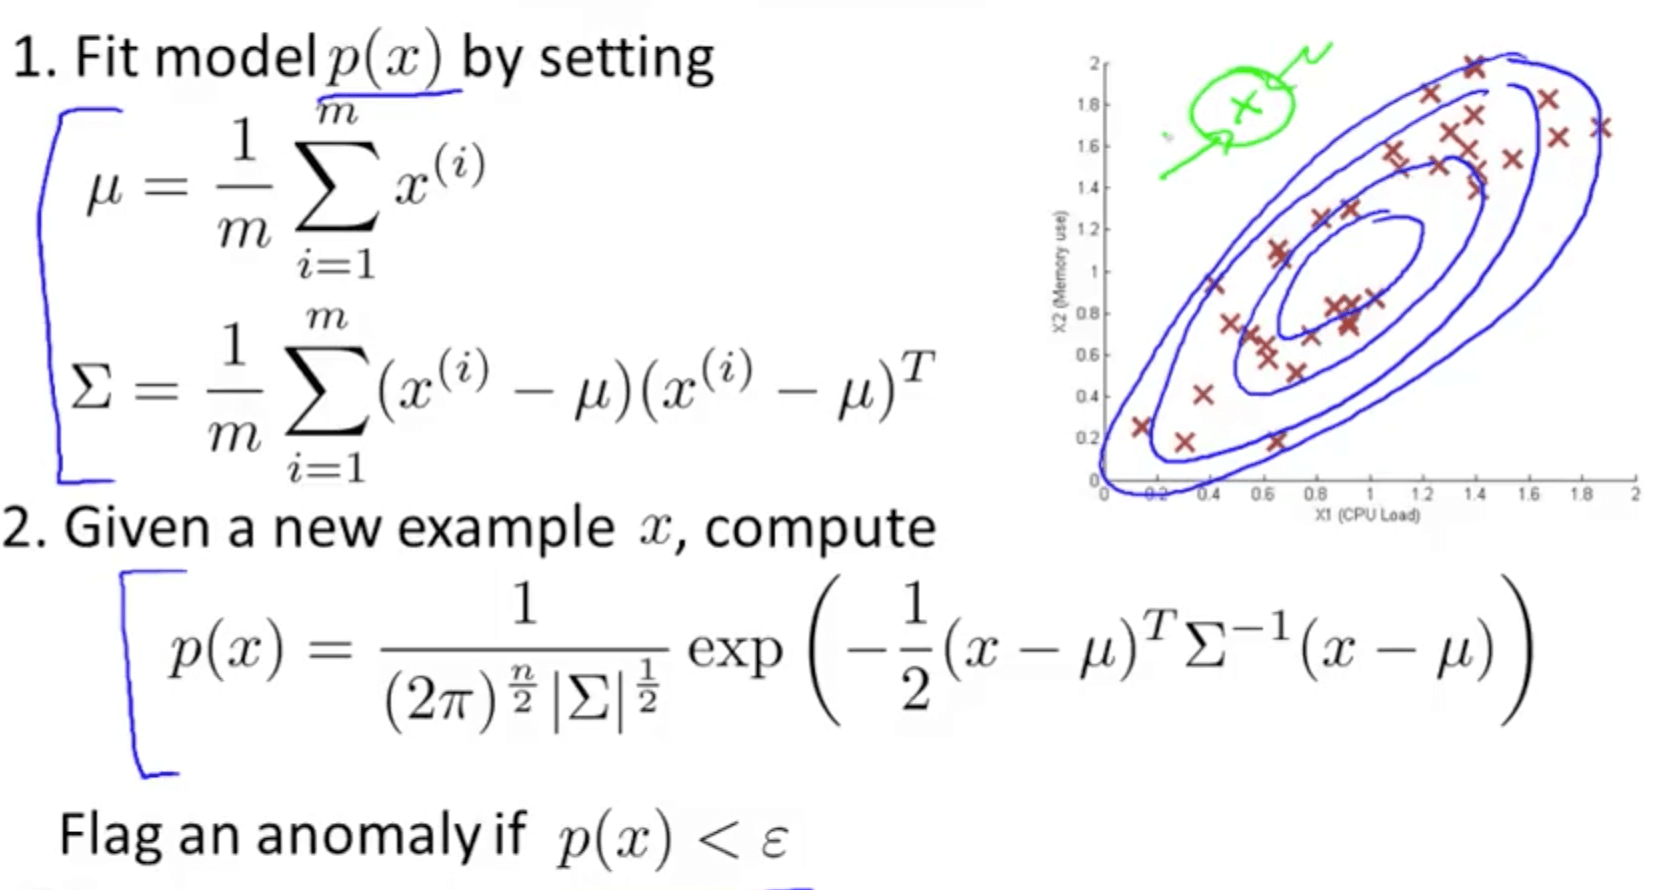

Pic Credits : Andrew Ng

In [ ]:
def est_gaus_par(X):
    mu = np.mean(X,axis=0)
    sig = np.std(X,axis=0)
    return mu,sig


def est_mult_gaus(X,mu,sigma):
    m = len(mu)
    sigma2 = np.diag(sigma)
    X = X-mu.T
    p = 1/((2*np.pi)**(m/2)*np.linalg.det(sigma2)**(0.5))*np.exp(-0.5*np.sum(X.dot(np.linalg.pinv(sigma2))*X,axis=1))

    return p

mu,sigma = est_gaus_par(X_Val)
p_val_array = est_mult_gaus(X_Val, mu, sigma)

In [ ]:
#stepsize = (np.max(p_val_array) - np.min(p_val_array))/1000
#epsVec = np.arange(np.min(p_val_array), np.max(p_val_array), stepsize)

In [ ]:
#F1score = 0
#BesEps = 0
#for eps in epsVec :
    #Y_predt =p<eps
    #if(f1_score(Y_Val,Y_predt)>F1score) :
        #BesEps= eps
        
#print(BesEps)
#print(F1score)

In [ ]:
Best_threhold = p_val_array.max()/1000

In [ ]:
Y_predt =p_val_array<Best_threhold
print('F1Score : ',f1_score(Y_Val,Y_predt))
print('PrecisionScore : ',precision_score(Y_Val,Y_predt))
print('RecallScore : ',recall_score(Y_Val,Y_predt))

In [ ]:
mu,sigma = est_gaus_par(X_test)
p_test = est_mult_gaus(X_test, mu, sigma)

In [ ]:
Y_pred_test =p_test<Best_threhold
print('F1Score : ',f1_score(Y_test,Y_pred_test))
print('PrecisionScore : ',precision_score(Y_test,Y_pred_test))
print('RecallScore : ',recall_score(Y_test,Y_pred_test))

I am little bit skiptical about process of  chossing the threshold value of probability through which a example can be classsified as anamoly.
I have tried differents methods could not one that shows some result.
If any please let me know in the comments.

# Thank You